# <center> **Home Credit Default Risk Assessment**
# <center> **Exploratory Data Analysis (EDA)**

# **Introduction**

In this part of the project, I visually display interesting insights from the data in the main application_train table. Below is a list of visualizations in this section of the project.

>* **1. Target Distribution**  <br> 
>* **2. Age Distribution** <br>
>* **3. Gender Distribution** <br>
>* **4. Employment Distribution**  <br>
>* **5. Family Status** <br>
>* **6. Number of Children** <br>
>* **7. Eduction**  <br>
>* **8. Income**  <br>
>* **9. Housing Types**   <br>
>* **10. Loan Amounts** <br>
>* **11. Correlation Coefficient** <br>
>* **12. Spearman Correlation** <br>
>* **13. Mutual Information Plot** <br>

# **Libraries**

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from feature_engine.selection import DropCorrelatedFeatures
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import chi2_contingency

import functions
import importlib
importlib.reload(functions)

import warnings

# **Display**

In [7]:
%matplotlib inline

pd.options.display.max_rows = 300000
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 500

warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)

pd.set_option('display.max_rows', 200)

size = 20

## **Colors**

In [8]:
color_1 = "bisque"
color_2 = "crimson"
color_3 = "orangered"
color_4 = "lightcoral"
color_5 = "royalblue"
color_6 = "indianred"
color_7 = "slategrey"
color_8 = "salmon"
color_9 = "beige"
color_10 = "coral"
color_11 = "grey"
color_12 = "tan"
color_13 = "wheat"
color_14 = "tomato"

In [9]:
size = 20

params = {
    "font.family": "Times New Roman",
    "font.size": size,
    "axes.labelsize": size,
    "xtick.labelsize": size * 0.75,
    "ytick.labelsize": size * 0.75,
    "figure.titlesize": size * 1.5,
    "axes.titlesize": size * 1.5,
    "axes.titlepad": size,
    "axes.labelpad": size - 10,
    "lines.linewidth": 2,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.spines.left": False,
    "axes.spines.bottom": False,
    "legend.fontsize": size,
    "figure.figsize": (10, 6),
}

# **Data**

## **Load Data**

In [10]:
train = pd.read_csv(
    r"C:\Users\Dell\Documents\AI\Risk\Data\Data\train 20.csv",
    index_col=False
)

# **Exploratory Data Analysis**

## **Target Disbribution**

### **Insight:** Over 90% of the clients did not default on their loan. This is a highly imbalanced dataset.

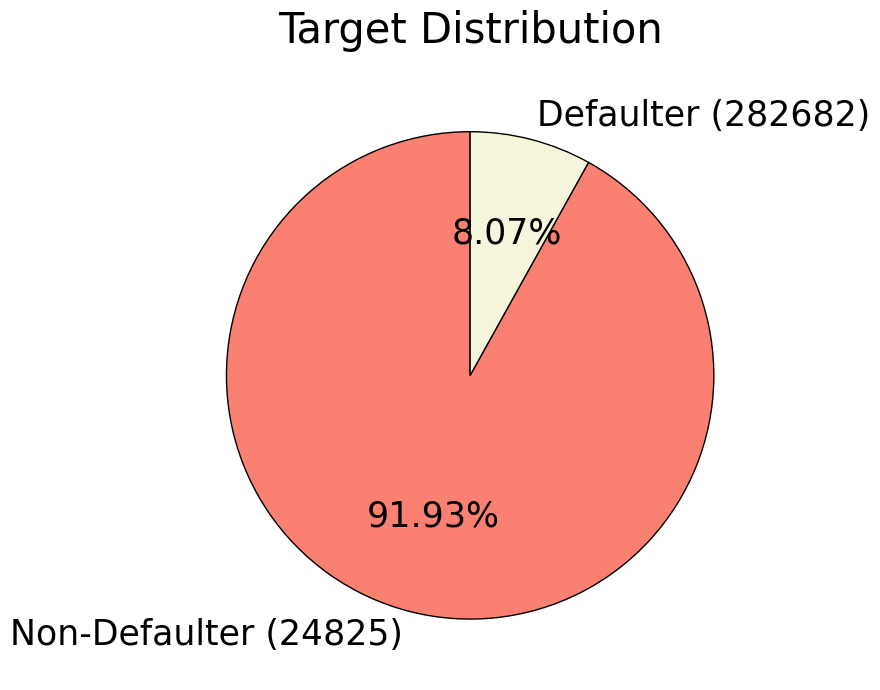

In [7]:
data = train['TARGET'].value_counts()
colors = [color_8, color_9]
labels = [f'Non-Defaulter ({data[1]})', f'Defaulter ({data[0]})']
title = "Target Distribution"

functions.piechart(data, title, colors, labels, size)

## **Age**

### **Insight:** Majority of the clients are in the age range 25 to 55.

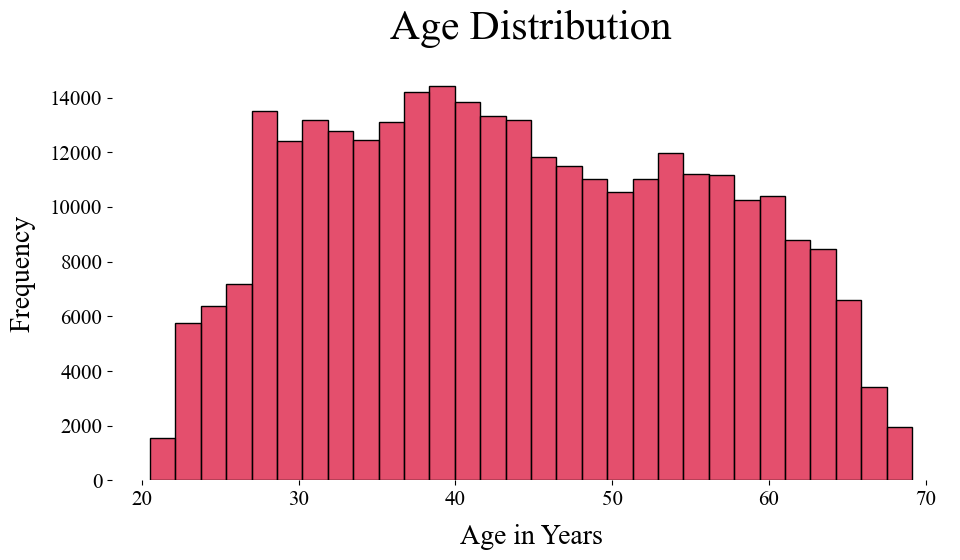

In [8]:
data = train
column = 'AGE'
title = 'Age Distribution'
color = color_2
x_label = 'Age in Years'
y_label = 'Frequency'
bins = 30

functions.histplot(data, column, title, color, x_label, y_label, bins)

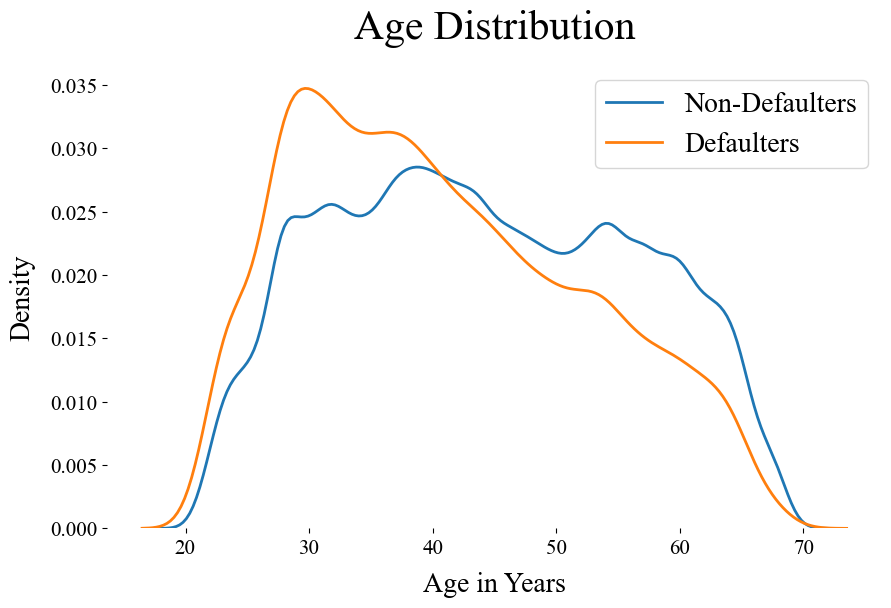

In [9]:
plt.figure(figsize=(10,6))

sns.kdeplot(train.loc[train['TARGET'] == 0, 'AGE'], label='Non-Defaulters')
sns.kdeplot(train.loc[train['TARGET'] == 1, 'AGE'], label='Defaulters')

plt.title('Age Distribution');
plt.xlabel('Age in Years');
plt.ylabel('Density');
plt.legend();

## **Gender**

### **Insight:** Majority of the clients are female.

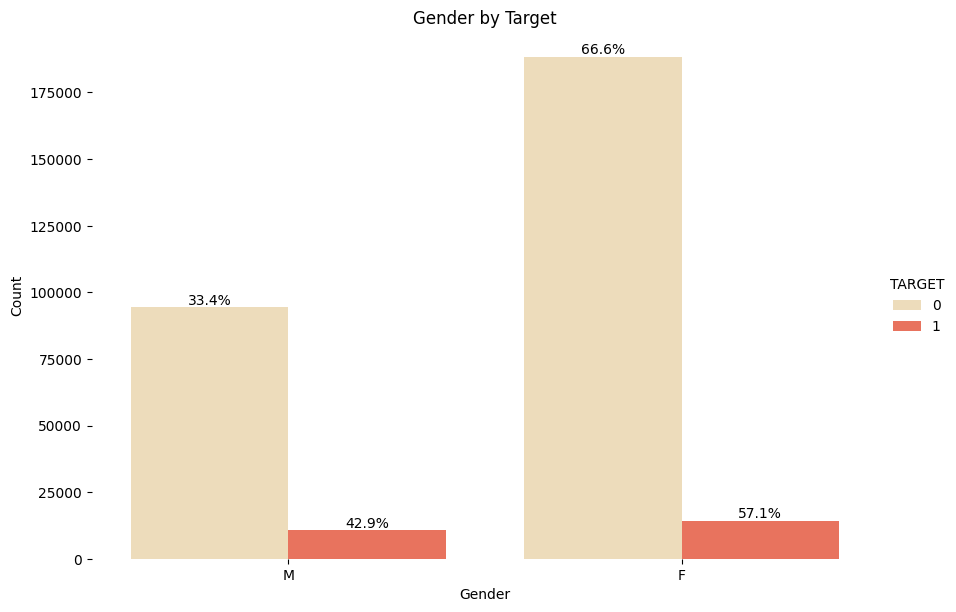

In [9]:
g = sns.catplot(
    data=train, 
    x='CODE_GENDER', 
    hue='TARGET', 
    kind='count', 
    height=6, 
    aspect=1.5, 
    palette=[color_13, color_14]
)

for ax in g.axes.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)


for ax in g.axes.flat:
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()  
            total = sum([b.get_height() for b in container])  
            percentage = 100 * height / total  
            label = f'{percentage:.1f}%'  
            
          
            ax.text(
                bar.get_x() + bar.get_width() / 2,  
                height, 
                label, 
                ha='center', va='bottom'  
            )

# Set title and axis labels
plt.title('Gender by Target')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show plot
plt.show()


## **Employment**

### **Insight:** Majority of the clients were employed 10 years or less.

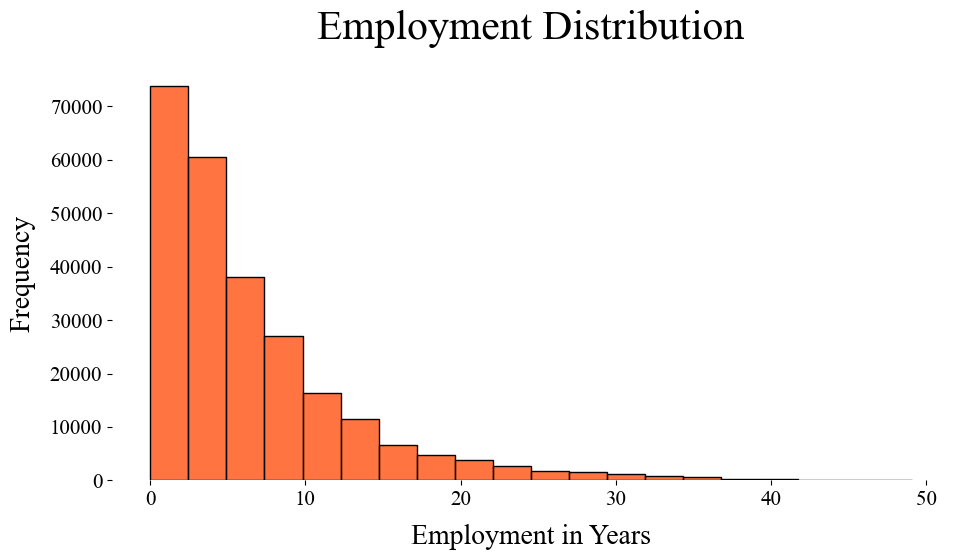

In [31]:
data = train
column = 'YEARS_EMPLOYED'
title = 'Employment Distribution'
color = color_3
x_label = 'Employment in Years'
y_label = 'Frequency'
bins = 20

functions.histplot(data, column, title, color, x_label, y_label, bins)

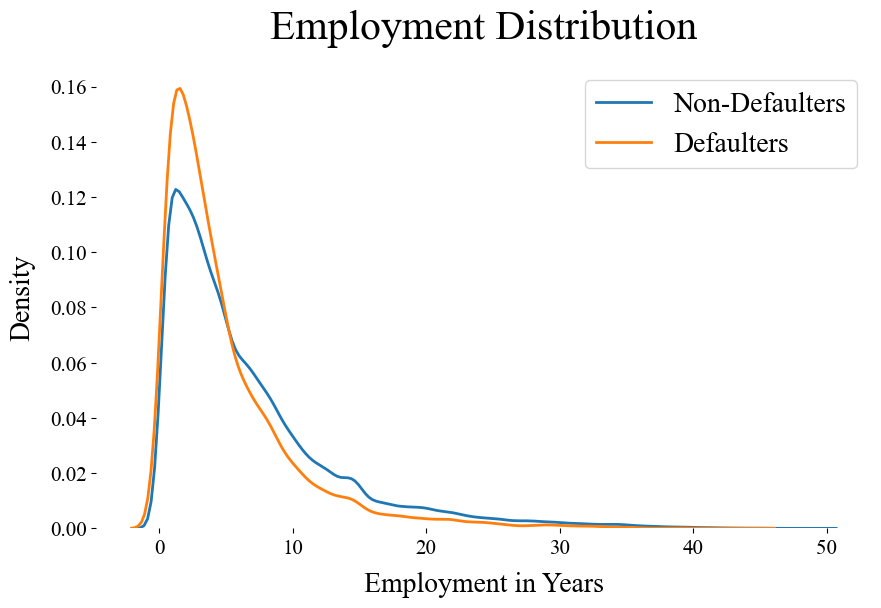

In [32]:
plt.figure(figsize=(10,6))

sns.kdeplot(train.loc[train['TARGET'] == 0, 'YEARS_EMPLOYED'], label='Non-Defaulters')
sns.kdeplot(train.loc[train['TARGET'] == 1, 'YEARS_EMPLOYED'], label='Defaulters')

plt.title('Employment Distribution');
plt.xlabel('Employment in Years');
plt.ylabel('Density');
plt.legend();

## **Family Status**

### **Insight:** The majority of the clients were married.

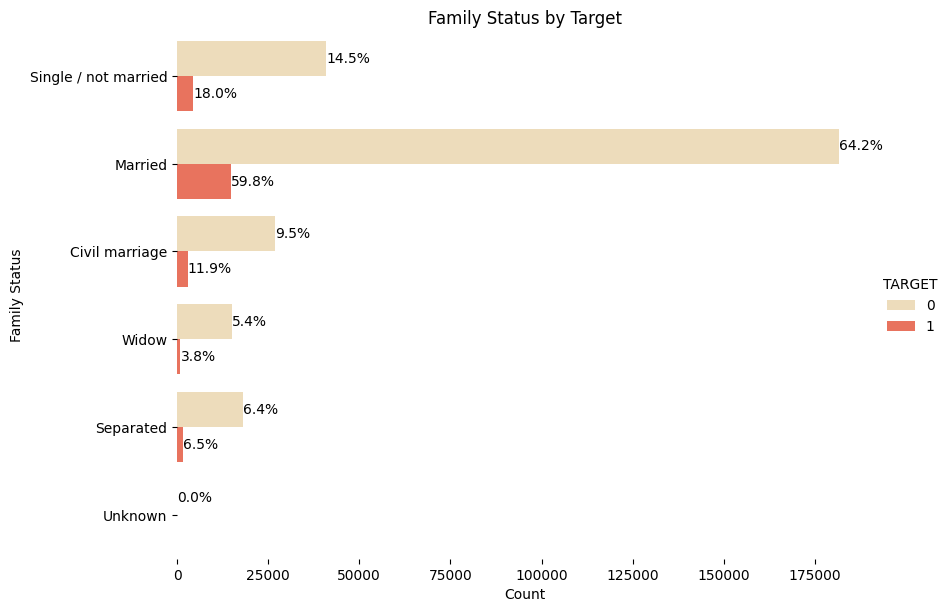

In [7]:
g = sns.catplot(
    data=train, 
    y='NAME_FAMILY_STATUS', 
    hue='TARGET', 
    kind='count', 
    height=6, 
    aspect=1.5, 
    palette=[color_13, color_14]
)

for ax in g.axes.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

for ax in g.axes.flat:
    for container in ax.containers:
        labels = []
        for bar in container:
            count = bar.get_width()
            total = sum([b.get_width() for b in container])
            percentage = 100 * count / total
            label = f'{percentage:.1f}%' 
            ax.text(count, bar.get_y() + bar.get_height() / 2, label, ha='left', va='center')


plt.title('Family Status by Target')
plt.xlabel('Count')
plt.ylabel('Family Status')

# Show plot
plt.show()


## **Number of Children**

### **Insight:** Majority of clients did not have children, followed by 1 child, 2 children and 3 children.

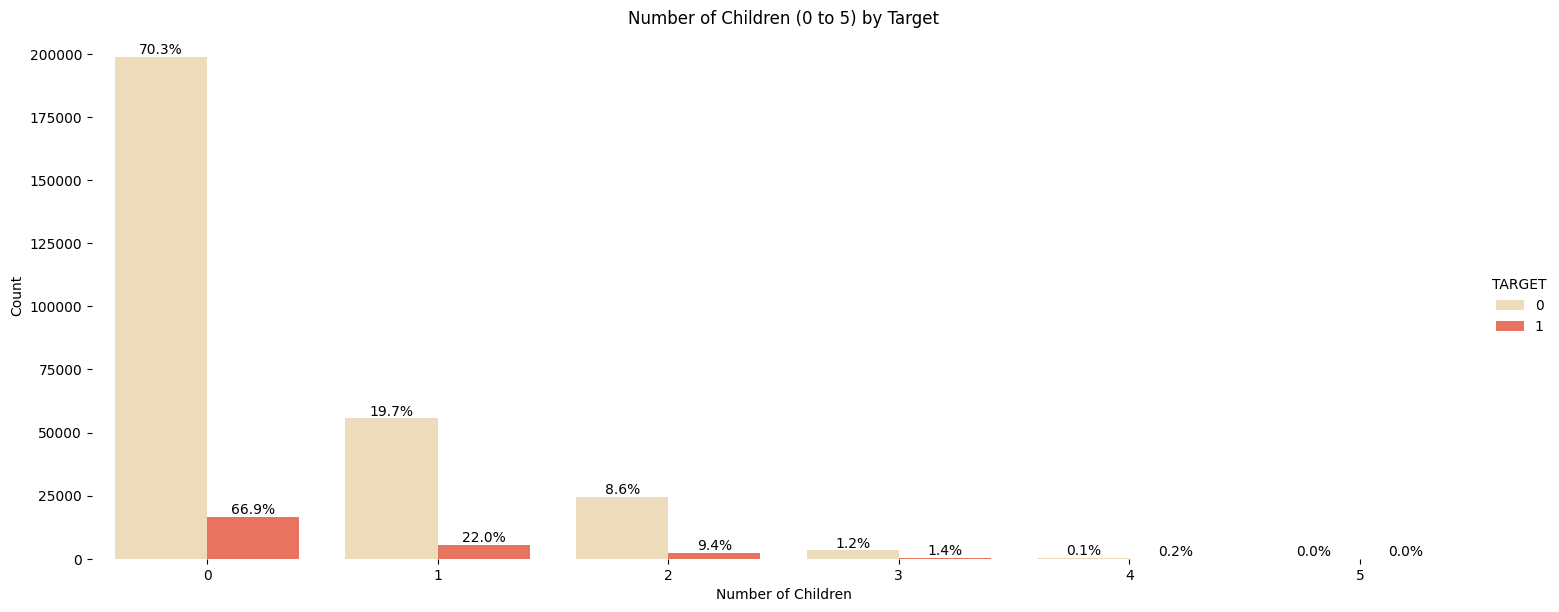

In [12]:
filtered_data = train[train['CNT_CHILDREN'].between(0, 5)]

g = sns.catplot(data=filtered_data, x='CNT_CHILDREN', hue='TARGET', kind='count', height=6, aspect=2.5, palette=[color_13, color_14])

for ax in g.axes.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

for ax in g.axes.flat:
    for container in ax.containers:
        for bar in container:
            height = bar.get_height()
            total = sum([b.get_height() for b in container])
            percentage = 100 * height / total
            label = f'{percentage:.1f}%'
            ax.text(bar.get_x() + bar.get_width() / 2, height, label, ha='center', va='bottom')

plt.title('Number of Children (0 to 5) by Target')
plt.xlabel('Number of Children')
plt.ylabel('Count')

plt.show()


## **Education Type**

### **Insight:** Majority of clients had completed secondary education, which could mean high school. This was followed by those who had completed higher level education, which could mean university.

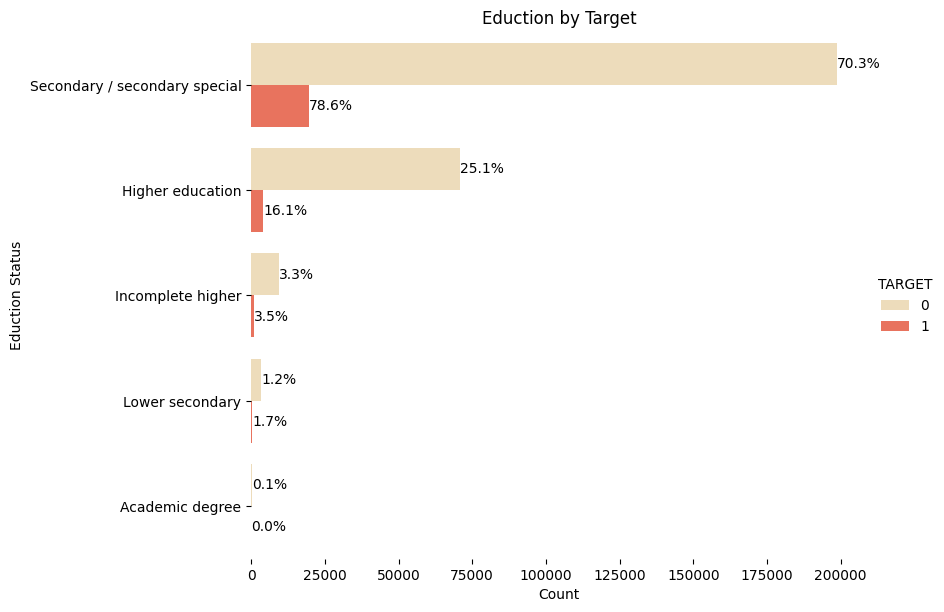

In [13]:
g = sns.catplot(data=train, y='NAME_EDUCATION_TYPE', hue='TARGET', kind='count', height=6, aspect=1.5, palette=[color_13, color_14])

for ax in g.axes.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

for ax in g.axes.flat:
    for container in ax.containers:
        for bar in container:
            width = bar.get_width()
            total = sum([b.get_width() for b in container])
            percentage = 100 * width / total
            label = f'{percentage:.1f}%'
            ax.text(width, bar.get_y() + bar.get_height() / 2, label, ha='left', va='center')

plt.title('Eduction by Target')
plt.xlabel('Count')
plt.ylabel('Eduction Status')

plt.show()


## **Income**

### **Insight:** Majority of clients identified themselves as "working." 

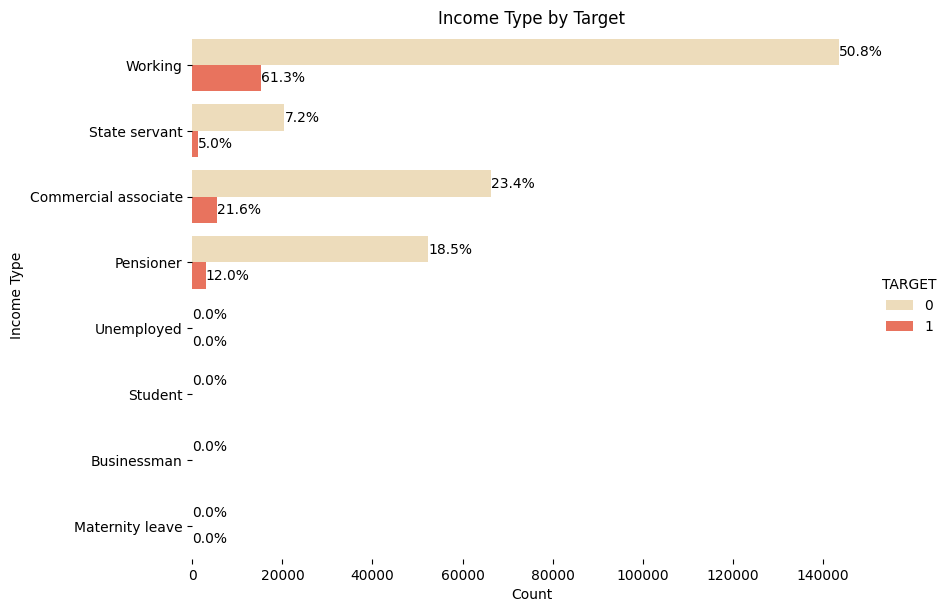

In [14]:
g = sns.catplot(data=train, y='NAME_INCOME_TYPE', hue='TARGET', kind='count', height=6, aspect=1.5, palette=[color_13, color_14])

for ax in g.axes.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

for ax in g.axes.flat:
    for container in ax.containers:
        for bar in container:
            width = bar.get_width()
            total = sum([b.get_width() for b in container])
            percentage = 100 * width / total
            label = f'{percentage:.1f}%'
            ax.text(width, bar.get_y() + bar.get_height() / 2, label, ha='left', va='center')

plt.title('Income Type by Target')
plt.xlabel('Count')
plt.ylabel('Income Type')

plt.show()


## **Housing Type**

### **Insight:** Majority of clients lived in a house or apartment that they owned.

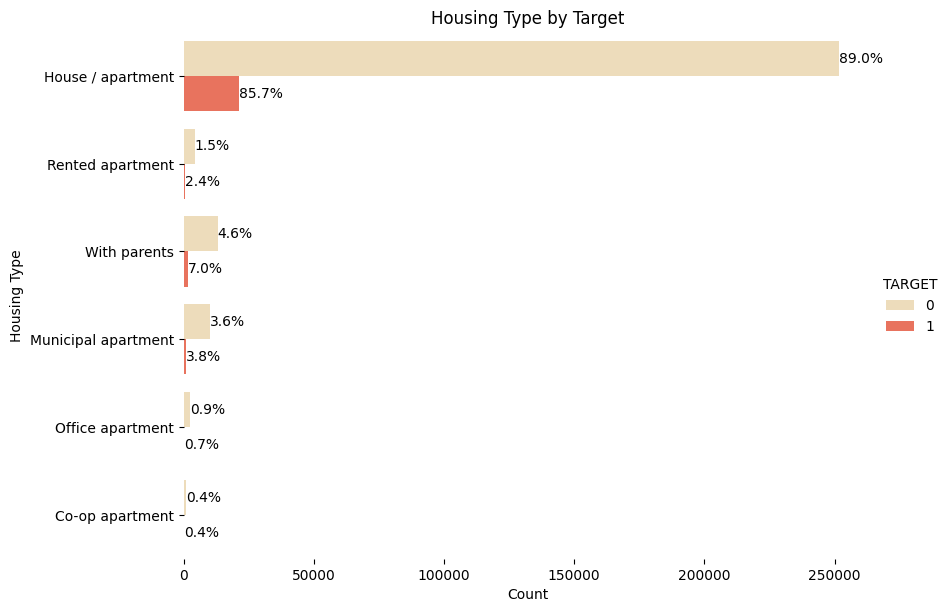

In [15]:
g = sns.catplot(data=train, y='NAME_HOUSING_TYPE', hue='TARGET', kind='count', height=6, aspect=1.5, palette=[color_13, color_14])

for ax in g.axes.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

for ax in g.axes.flat:
    for container in ax.containers:
        for bar in container:
            width = bar.get_width()
            total = sum([b.get_width() for b in container])
            percentage = 100 * width / total
            label = f'{percentage:.1f}%'
            ax.text(width, bar.get_y() + bar.get_height() / 2, label, ha='left', va='center')

plt.title('Housing Type by Target')
plt.xlabel('Count')
plt.ylabel('Housing Type')

plt.show()


## **Distribution of Loan Amounts by Default Status**

### **Insight:** Loans amounts of $1,000,000 and less were the majority.

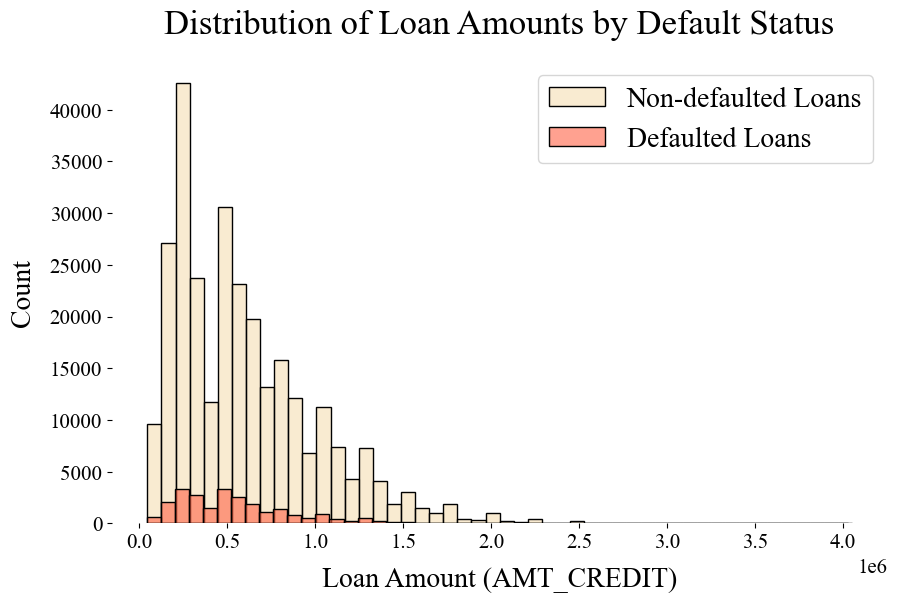

In [64]:
data = train

defaulted_loans = data[data['TARGET'] == 1]['AMT_CREDIT']
non_defaulted_loans = data[data['TARGET'] == 0]['AMT_CREDIT']

plt.figure(figsize=(10, 6))

sns.histplot(non_defaulted_loans, color=color_13, kde=False, bins=50, label='Non-defaulted Loans', alpha=0.6)

sns.histplot(defaulted_loans, color=color_14, kde=False, bins=50, label='Defaulted Loans', alpha=0.6)

plt.title('Distribution of Loan Amounts by Default Status', fontsize=size+5)
plt.xlabel('Loan Amount (AMT_CREDIT)', fontsize=size)
plt.ylabel('Count', fontsize=size)
plt.legend()

plt.show()


# **Correlations**

Here, we will investigate correlation between features and TARGET.

## **Pearson Correlation Coefficient**

### **Insight:**  The correlation coefficient or Pearson's correlation measures the strength and direction of a linear relationship between two variables. EXT_SORUCE_1, EXT_SOURCE_2 and EXT_SOURCE_3 were better correlated with TARGET than any other feature.

In [8]:
corr_matrix = train.corr(numeric_only=True)
corr_matrix['TARGET'].sort_values(ascending=True)

EXT_SOURCE_3                   -0.178925
EXT_SOURCE_2                   -0.160471
EXT_SOURCE_1                   -0.155318
AGE                            -0.078242
YEARS_EMPLOYED                 -0.074956
YEARS_LAST_PHONE_CHANGE        -0.055220
YEARS_ID_PUBLISH               -0.051458
FLOORSMAX_AVG                  -0.044010
FLOORSMAX_MEDI                 -0.043775
FLOORSMAX_MODE                 -0.043233
YEARS_REGISTRATION             -0.041976
AMT_GOODS_PRICE                -0.039647
REGION_POPULATION_RELATIVE     -0.037229
ELEVATORS_AVG                  -0.034202
ELEVATORS_MEDI                 -0.033866
FLOORSMIN_AVG                  -0.033620
FLOORSMIN_MEDI                 -0.033401
LIVINGAREA_AVG                 -0.033001
LIVINGAREA_MEDI                -0.032744
FLOORSMIN_MODE                 -0.032704
TOTALAREA_MODE                 -0.032599
ELEVATORS_MODE                 -0.032135
NAME_CONTRACT_TYPE             -0.030886
ORGANIZATION_TYPE              -0.030767
LIVINGAREA_MODE 

## **Spearman Correlation**

In [ ]:
numerical_cols = [cname for cname in train.columns if train[cname].dtype in ['int64', 'float64']]
numerical_train = train[numerical_cols]

### **Insight:** Spearman Correlation measures the monotonic relationship between two variables, meaning that as one variable increases, the other either always increases or always decreases, but not necessarily at a constant rate. It is robust to outliers and suitable for non-linear relationships. EXT_SORUCE_1, EXT_SOURCE_2 and EXT_SOURCE_3 were better correlated with TARGET than any other feature.

In [13]:
functions.spearman_correlation(numerical_df, 'TARGET')

                         Feature  Spearman Correlation
30                  EXT_SOURCE_3             -0.145396
28                  EXT_SOURCE_1             -0.128047
29                  EXT_SOURCE_2             -0.119826
8                 YEARS_EMPLOYED             -0.066161
2               AMT_INCOME_TOTAL             -0.051041
52                FLOORSMAX_MODE             -0.049498
38                 FLOORSMAX_AVG             -0.049342
66                FLOORSMAX_MEDI             -0.048266
7                            AGE             -0.046772
36                 ELEVATORS_AVG             -0.040920
64                ELEVATORS_MEDI             -0.038853
50                ELEVATORS_MODE             -0.037711
42                LIVINGAREA_AVG             -0.037622
70               LIVINGAREA_MEDI             -0.036014
56               LIVINGAREA_MODE             -0.036010
31                APARTMENTS_AVG             -0.033936
73                TOTALAREA_MODE             -0.033837
59        

## **Drop Correlated Features**

The code below drops correlated features and reduces the number of features used in the Mutual Information Plot.

In [11]:
dcf = DropCorrelatedFeatures(threshold=0.7)
train = dcf.fit_transform(train)

## **Mutual Information Plot**

### **Insight:** Mutual information measures how much knowing one variable reduces uncertainty about the other, capturing both linear and non-linear relationships. EXT_SORUCE_1, EXT_SOURCE_2 and EXT_SOURCE_3 were better correlated with TARGET than any other feature.

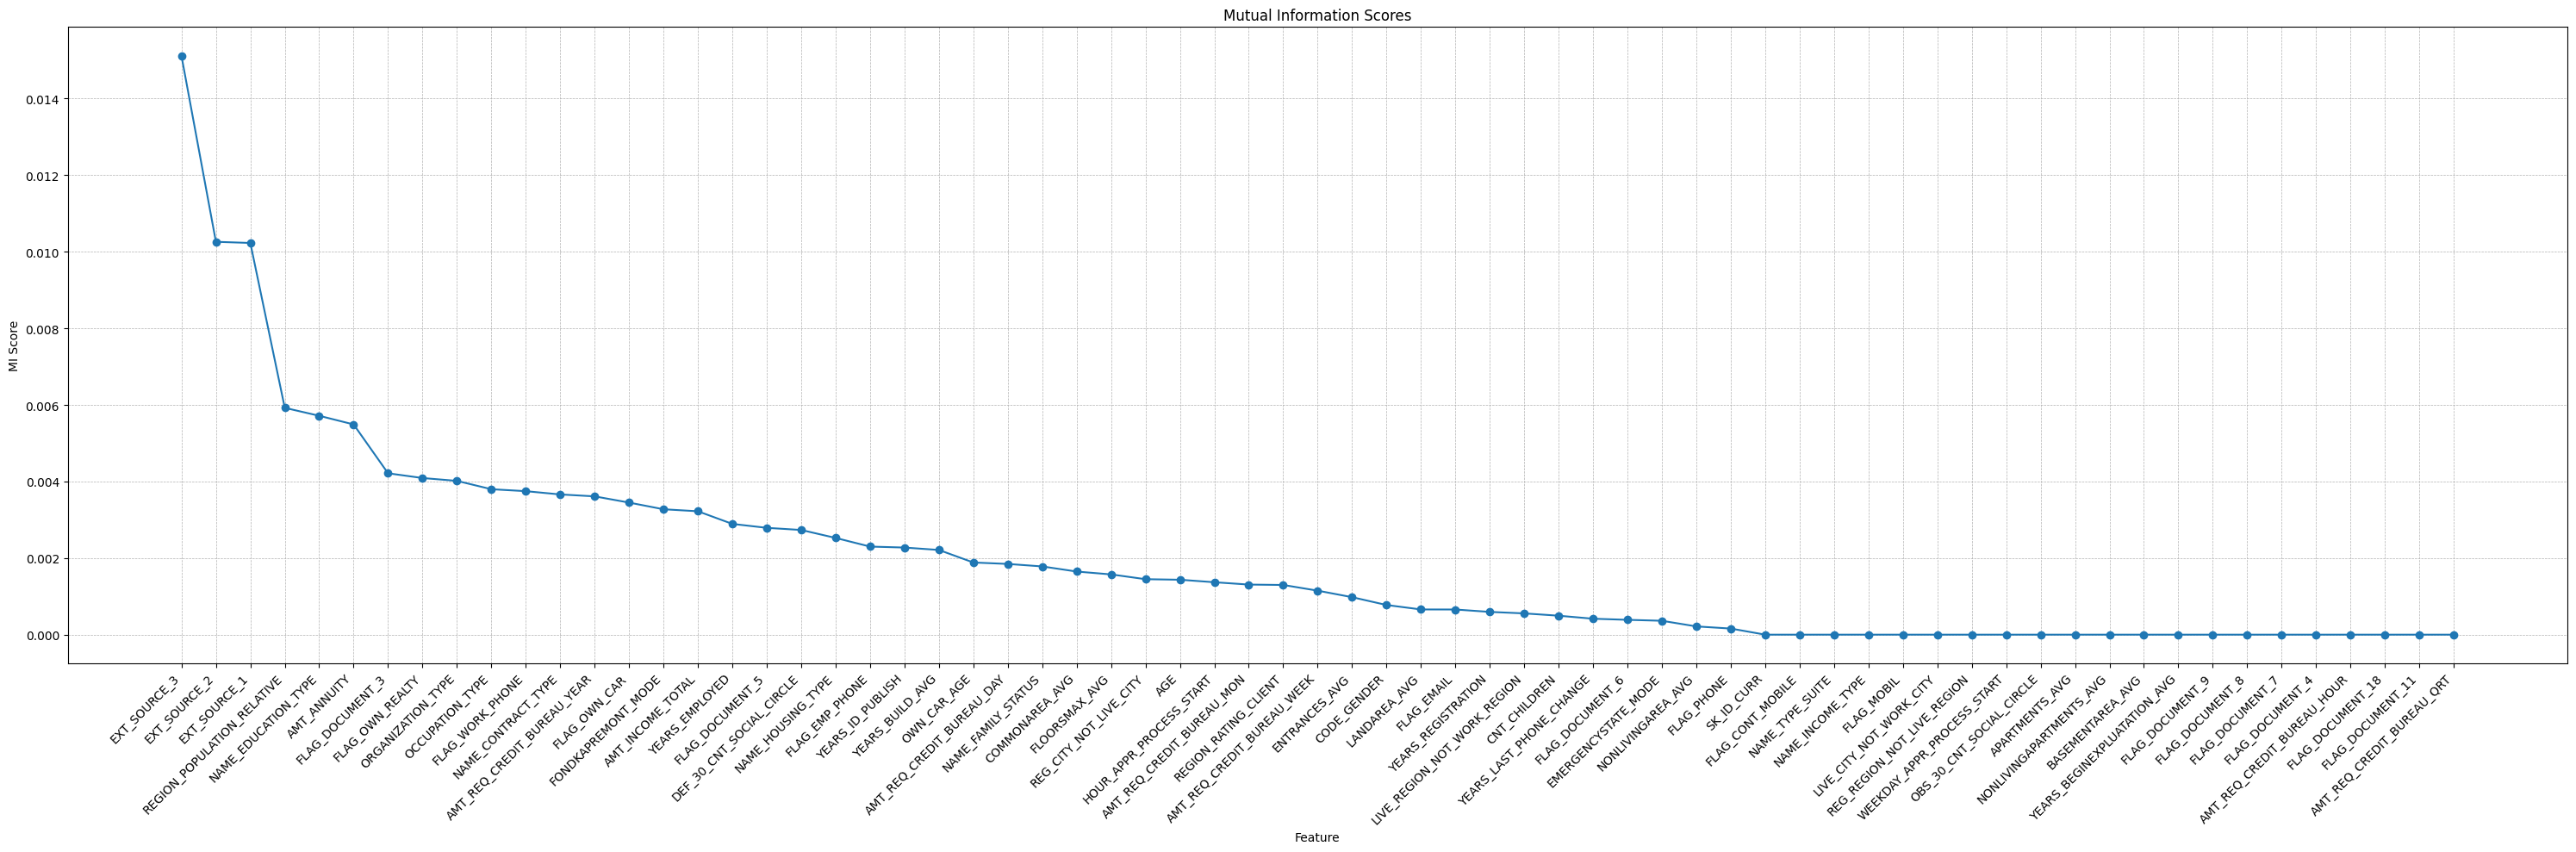

In [16]:
features = train.drop(columns=['TARGET'])
target = train['TARGET']

features = features.dropna()
target = target[features.index] 
features = pd.get_dummies(features, drop_first=True)

mi_scores = mutual_info_classif(features, target)
functions.create_plot_mi_scores(features, mi_scores)

## **Cramer's V Correlation (Categorical Features)**

### **Insight:** Cramér's V provides a measure of association between two categorical variables. It ranges from 0 to 1. None of the categorical features show a high level of correlation with TARGET.

In [15]:
def cramers_v(chi2, n, table):
    min_dim = min(table.shape) - 1  
    return np.sqrt(chi2 / (n * min_dim))


def calculate_cramers_v(train, target_var):
    results = {}
    n = train.shape[0]  

    for col in train.columns:
        if col != target_var and train[col].dtype == 'object':  
            # Create contingency table
            contingency_table = pd.crosstab(train[col], train[target_var])
            chi2, _, _, _ = chi2_contingency(contingency_table)
            cramers_v_value = cramers_v(chi2, n, contingency_table)
            results[col] = cramers_v_value

    return results


cramers_v_results = calculate_cramers_v(train, 'TARGET')

print("Cramér's V Results:")
for variable, v in cramers_v_results.items():
    print(f"{variable}: {v:.4f}")

Cramér's V Results:
NAME_CONTRACT_TYPE: 0.0309
CODE_GENDER: 0.0547
FLAG_OWN_CAR: 0.0218
FLAG_OWN_REALTY: 0.0061
NAME_TYPE_SUITE: 0.0103
NAME_INCOME_TYPE: 0.0638
NAME_EDUCATION_TYPE: 0.0576
NAME_FAMILY_STATUS: 0.0405
NAME_HOUSING_TYPE: 0.0370
OCCUPATION_TYPE: 0.0675
WEEKDAY_APPR_PROCESS_START: 0.0071
ORGANIZATION_TYPE: 0.0723
FONDKAPREMONT_MODE: 0.0074
HOUSETYPE_MODE: 0.0095
WALLSMATERIAL_MODE: 0.0213
EMERGENCYSTATE_MODE: 0.0088


# **Summary**

> * **Visualizations** — I provided various visualizations to make different aspects of this dataset clear. 
> * **Correlation Coefficient** — EXT_SORUCE_1, EXT_SOURCE_2 and EXT_SOURCE_3 were better correlated with TARGET than any other feature.
> * **Spearman Correlation** — EXT_SORUCE_1, EXT_SOURCE_2 and EXT_SOURCE_3 were better correlated with TARGET than any other feature.
> * **Mutual Information Plot** — EXT_SORUCE_1, EXT_SOURCE_2 and EXT_SOURCE_3 were better correlated with TARGET than any other feature.
> * **Cramer's V (Categorical Features)** — None of the categorical features show a high correlation with TARGET.